Multilayer neural networks are the foundation of deep learning. The multilayer perceptron was the first standardized architecture. In this assignment, you will learn to tune a multilayer perceptron model.

In [6]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model

In [72]:
'''
Code implements multi-perceptron neural network to classify MNIST images of
handwritten digits using Keras and Tensorflow.  Based on code from
https://www.packtpub.com/books/content/training-neural-networks-efficiently-using-keras
'''

def load_and_condition_MNIST_data():
    ''' loads and shapes MNIST image data '''
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    print("\nLoaded MNIST images")
    X_train = X_train.astype(np.float32) #before conversion were uint8
    X_test = X_test.astype(np.float32)
    X_train.resize(len(y_train), 784) # 28 pix x 28 pix = 784 pixels
    X_test.resize(len(y_test), 784)
    print('\nFirst 3 labels of MNIST y_train: {}'.format(y_train[:3]))
    y_train_ohe = to_categorical(y_train) # one hot encode the target
    print('\nFirst 3 labels of MNIST y_train (one-hot):\n{}'.format(y_train_ohe[:3]))
    return X_train, y_train, X_test, y_test, y_train_ohe

In [73]:
X_train, y_train, X_test, y_test, y_train_onehot = load_and_condition_MNIST_data()  
#n_samples x n_features
X_train.shape, X_test.shape


Loaded MNIST images

First 3 labels of MNIST y_train: [5 0 4]

First 3 labels of MNIST y_train (one-hot):
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


((60000, 784), (10000, 784))

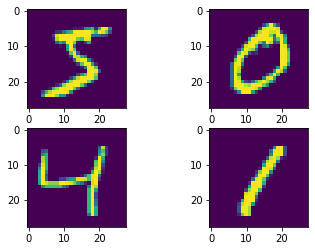

In [9]:

import matplotlib.pyplot as plt

f, ax = plt.subplots(2,2)

for i in range(4):
  binax = bin(i)[2:].zfill(2)
  ax[int(binax[0]), int(binax[1])].imshow(X_train[i].reshape(28,28))

In [10]:
#Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#clf = DecisionTreeClassifier().fit(X_train, y_train)
#yhat1 = clf.predict(X_test)
#print(accuracy_score(y_test, yhat1))

In [11]:
#One-vs-all logistic classifier
#It's slow to train ten models but does a little better than the tree!
from sklearn.multiclass import OneVsRestClassifier
#the estimator is stochastic gradient descent
from sklearn.linear_model import SGDClassifier

#lr = OneVsRestClassifier(SGDClassifier()).fit(X_train, y_train)
#yhat2 = lr.predict(X_test)
#print(accuracy_score(y_test, yhat2))

### Logistic Regression in Keras

The simplest neural network in Keras is a single node with no hidden layer. A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor. Features becomes nodes in the input layer. Here we have 784, one for each pixel in each image.

In [183]:
n_samples, n_features = X_train.shape
n_samples, n_features

(60000, 784)

In [184]:
#The input layer can be defined explicitly
model = Sequential(
          [ #there's a thousand yous, there's only one of me
            Dense (1, input_dim=n_features, activation='sigmoid')
           ]
)

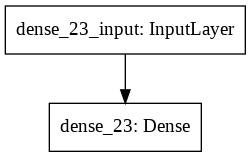

In [185]:
plot_model(model)

In [186]:
#Why does this run without training? Because weights are randomly initialized.
#With only one node, it can only predict yes/no, 1/0
yhat3 = model.predict(X_test)
yhat3 = np.array(yhat3, dtype=int)
print(accuracy_score(y_test, yhat3))

0.1485


The Glorot uniform initialization function draws samples from a uniform distribution within [-limit, limit], defined below. Small, somewhat random values are good starting points for neural netwok weights.

In [187]:
from math import sqrt
fan_in = n_features #the number of input units in the weight tensor
fan_out = 10 #the number of output units
limit = sqrt(6 / (fan_in + fan_out))
[-limit, limit]

[-0.0869291381699617, 0.0869291381699617]

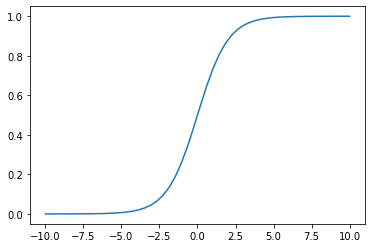

In [188]:

#here's what the activation/sigmoid function looks like
def sigmoid(z): return 1/ (1+np.exp(-z))
x = np.linspace(-10,10)
plt.plot(x, sigmoid(x)); #0 to 1 no matter how small or big x gets

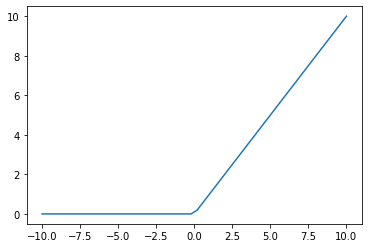

In [22]:
#why doesn't relu work here?
def rectified(z):
  lst=[]
  for i in z: lst.append(max(0, i))
  return lst
plt.plot(x, rectified(x));

In [189]:
theta = model.get_weights()[0]
bias = model.get_weights()[1]
theta.shape, X_test.shape

((784, 1), (10000, 784))

In [190]:
#prediction vector output from input vector, weights, and sigmoid function
predictions = sigmoid((X_test @ theta) + bias) #I think the bias goes there
predictions = np.array(predictions, dtype=int)

#prediction from one example
print(sigmoid(theta.T @ X_test[0] + bias)) #bias is still 0

#the current model can't do multiclass prediction w/ one output neuron
print(accuracy_score(y_test, predictions))

[0.]
0.1486


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


In [191]:
from tensorflow.keras.metrics import Precision, Recall

#make a 1/not-1 classifier
model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=[Precision(), Recall()] ) 

y1_train = y_train==1
y1_test = y_test==1

#implement this gradient descent from scratch
model.fit(X_train, y1_train, epochs=5, batch_size=5000, verbose=1,
              validation_split=0.1)

yhat4 = model.predict(X_test)
yhat4 = np.array(yhat4, dtype=int)
print("Test set accuracy for predicting ones:")
print(accuracy_score(y1_test, yhat4))

Epoch 1/5
11/11 [==============================] - 1s 42ms/step - loss: 289.8488 - precision_3: 0.4848 - recall_3: 0.4931 - val_loss: 12.9147 - val_precision_3: 0.9395 - val_recall_3: 0.9365
Epoch 2/5
11/11 [==============================] - 0s 13ms/step - loss: 15.6533 - precision_3: 0.9255 - recall_3: 0.9213 - val_loss: 10.5798 - val_precision_3: 0.9329 - val_recall_3: 0.9492
Epoch 3/5
11/11 [==============================] - 0s 15ms/step - loss: 12.7761 - precision_3: 0.9308 - recall_3: 0.9368 - val_loss: 8.7811 - val_precision_3: 0.9448 - val_recall_3: 0.9508
Epoch 4/5
11/11 [==============================] - 0s 14ms/step - loss: 10.8986 - precision_3: 0.9387 - recall_3: 0.9403 - val_loss: 7.5115 - val_precision_3: 0.9421 - val_recall_3: 0.9556
Epoch 5/5
11/11 [==============================] - 0s 12ms/step - loss: 9.5225 - precision_3: 0.9410 - recall_3: 0.9454 - val_loss: 6.5343 - val_precision_3: 0.9438 - val_recall_3: 0.9587
Test set accuracy for predicting ones:
0.9912


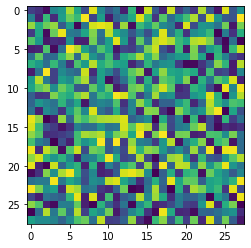

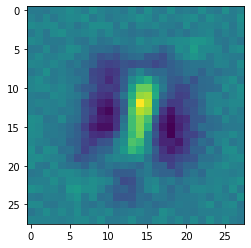

In [192]:
f, ax = plt.subplots(1,1)
ax.imshow(theta.reshape(28,28)); #untrained, noise

f, ax = plt.subplots(1,1)
theta2 = model.get_weights()[0]
#the dark cells are negative weights, they identify the zero loop
#the light cells are positive weights, they identify the one line
#we could trim most of the border pixels w/o losing accuracy
ax.imshow(theta2.reshape(28,28)); 

After randomizing weights, we calculate the intitial predictions like this:

yhat = sigma(w.T*x + b) where sigma(z) = 1/(1+exp(-z))

This is true for both logistic regression and the neural network. Where they differ is in updating the weights. Neural networks use partial derivatives (backpropogation) while logistic regression uses:

loss(yhat, y) = -(y*log(yhat) + (1-y)log*(1-yhat))

In [193]:
np.random.seed(0)

model = Sequential(
      [
       Dense(10, input_dim=n_features, activation='sigmoid')
      ]
)
#categorical rather than binary
model.compile(loss='categorical_crossentropy', 
              optimizer='sgd', metrics=["accuracy"])
#notice we're using one-hot labels instead of numerals
model.fit(X_train, y_train_onehot, epochs=7, batch_size=30000, verbose=1,
              validation_split=0.1);

Epoch 1/7
2/2 [==============================] - 1s 263ms/step - loss: 1049.7914 - accuracy: 0.2315 - val_loss: 3104.4514 - val_accuracy: 0.1822
Epoch 2/7
2/2 [==============================] - 0s 131ms/step - loss: 3374.0740 - accuracy: 0.2650 - val_loss: 3806.5300 - val_accuracy: 0.4232
Epoch 3/7
2/2 [==============================] - 0s 145ms/step - loss: 3852.4995 - accuracy: 0.4039 - val_loss: 3570.9587 - val_accuracy: 0.4503
Epoch 4/7
2/2 [==============================] - 0s 135ms/step - loss: 2994.0579 - accuracy: 0.4268 - val_loss: 1663.4408 - val_accuracy: 0.4203
Epoch 5/7
2/2 [==============================] - 0s 132ms/step - loss: 1721.4395 - accuracy: 0.4514 - val_loss: 1067.8911 - val_accuracy: 0.5785
Epoch 6/7
2/2 [==============================] - 0s 147ms/step - loss: 918.6644 - accuracy: 0.6114 - val_loss: 227.5482 - val_accuracy: 0.7955
Epoch 7/7
2/2 [==============================] - 0s 124ms/step - loss: 248.8132 - accuracy: 0.7767 - val_loss: 147.3917 - val_accura

In [194]:
yhat5 = model.predict(X_test)
print(yhat5[:2])
#argmax takes the index of the highest probability
#unfortunately, a lot of probabilities are 1 for the same label
#which means it's randomly guessing between many possibilities each time
yhat5 = np.argmax(yhat5, axis=1)
print("Test set accuracy:")
print(accuracy_score(y_test, yhat5))

[[0. 0. 1. 1. 1. 0. 0. 1. 0. 1.]
 [1. 1. 1. 1. 0. 1. 1. 0. 1. 0.]]
Test set accuracy:
0.2953


You'll notice the class probabilities for every class sum to more than 1.0. One solution is to apply a function to the neuron outputs that normalizes the vector such that it's constrained to add up to 1.0, and then calculate a loss from that function.

In [ ]:
model = Sequential(
      [
       Dense(10, input_dim=n_features, activation='softmax')
      ]
)
model.compile(loss='categorical_crossentropy', 
              optimizer='sgd', metrics=['accuracy'])
model.fit(X_train, y_train_onehot, epochs=30, batch_size=30000, verbose=1,
              validation_split=0.1);

In [201]:
#much better! for a single prediction, probabilities for all classes sums to 1
yhat6 = model.predict(X_test)
print(yhat6[:2])
yhat6 = np.argmax(yhat6, axis=1)
print("Test set accuracy:")
print(accuracy_score(y_test, yhat6))

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
Test set accuracy:
0.8829


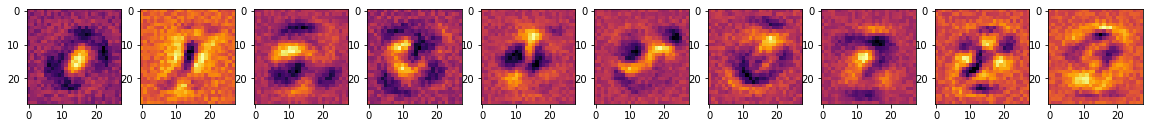

In [202]:
#visualizing output units
f,ax = plt.subplots(1,10, figsize=(20,2))
theta3 = model.get_weights()[0]

for i in range(10):
  ax[i].imshow(theta3.T[i].reshape(28,28), cmap='inferno_r'); 

### Logistic regression with hidden features

A perceptron is an architecture whereby an input is classified into a number of features; features that are actually unknown when model training begins. Then, logistic regression (or softmax regression) using the hidden features as inputs is used to find the final class probabilities. This architecture is called a "perceptron", "multiplayer perceptron", or "MLP". Here's how to define an MLP with 300 neurons in one hidden layer, using Keras

In [218]:
hidden_units = 300
n_classes = 10

model = Sequential(
    [ #hidden layer
     Dense(hidden_units, input_dim=n_features,
            kernel_initializer='constant',
            activation='sigmoid'),
      #output layer (I had extra square brackets)
     Dense(10, input_dim=hidden_units,
            kernel_initializer='uniform',
            activation='softmax')
    ]
)

model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy']) #adam is good for this

In [223]:
model.fit(X_train, y_train_onehot, epochs=12, batch_size=6000, verbose=1,
              validation_split=0.1);

Epoch 1/12
9/9 [==============================] - 2s 158ms/step - loss: 0.1831 - accuracy: 0.9503 - val_loss: 0.1699 - val_accuracy: 0.9545
Epoch 2/12
9/9 [==============================] - 1s 139ms/step - loss: 0.1734 - accuracy: 0.9535 - val_loss: 0.1641 - val_accuracy: 0.9560
Epoch 3/12
9/9 [==============================] - 1s 140ms/step - loss: 0.1653 - accuracy: 0.9557 - val_loss: 0.1601 - val_accuracy: 0.9562
Epoch 4/12
9/9 [==============================] - 1s 142ms/step - loss: 0.1579 - accuracy: 0.9580 - val_loss: 0.1569 - val_accuracy: 0.9575
Epoch 5/12
9/9 [==============================] - 1s 138ms/step - loss: 0.1508 - accuracy: 0.9602 - val_loss: 0.1528 - val_accuracy: 0.9572
Epoch 6/12
9/9 [==============================] - 1s 142ms/step - loss: 0.1443 - accuracy: 0.9626 - val_loss: 0.1494 - val_accuracy: 0.9583
Epoch 7/12
9/9 [==============================] - 1s 139ms/step - loss: 0.1385 - accuracy: 0.9639 - val_loss: 0.1468 - val_accuracy: 0.9590
Epoch 8/12
9/9 [====

In [224]:
yhat7 = model.predict(X_test)
print(yhat7[:2])
yhat7 = np.argmax(yhat7, axis=1)
print("Test set accuracy:")
print(accuracy_score(y_test, yhat7))

[[6.5546927e-05 4.2666765e-05 3.0947995e-04 8.0579595e-04 5.6906305e-05
  1.7251160e-04 1.8518314e-06 9.9798846e-01 3.9995117e-05 5.1683589e-04]
 [4.0234262e-03 5.8877589e-03 9.6228117e-01 7.1382802e-03 6.4965621e-05
  1.0021315e-02 7.7036903e-03 6.9824273e-05 2.7419126e-03 6.7753244e-05]]
Test set accuracy:
0.9513



Keras has a wrapper for the scikit-learn API where you can interface with GridSearch.
https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

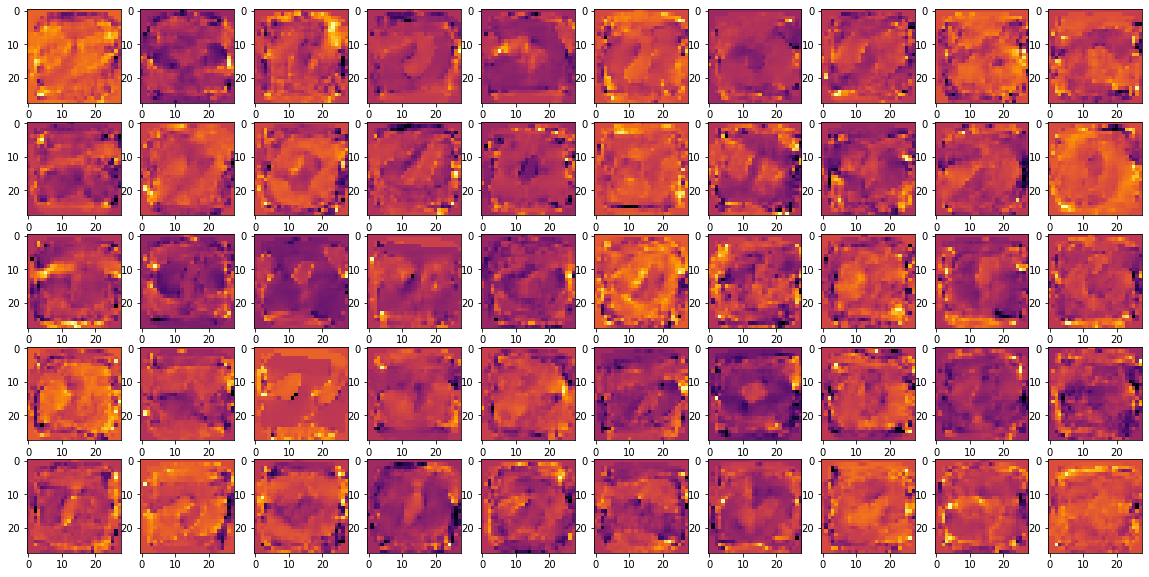

In [252]:
#visualizing some hidden units, 50 of 300
#how do we visualize the outputs?
f,ax = plt.subplots(5,10, figsize=(20,10))
theta4 = model.get_weights()[0].T
a=0
#sharp contrasts indicate key pixels for that neuron
#each one finds a little edge
for i in range(10):
  for j in range(5):
    ax[j,i].imshow(theta4[a].reshape(28,28), cmap='inferno_r')
    a+=1;